In [1]:
import pandas as pd
import numpy as np

In [2]:
node2vec_df = pd.read_csv('../../results/node2vec/reco_group.csv', index_col=0)
metapath2vec_rs_df = pd.read_csv('../../results/strategy2/reco_group.csv', index_col=0)
metapath2vec_rs_fair_df = pd.read_csv('../../results/strategy4/reco_group.csv', index_col=0)

In [3]:
def get_prob(row, sf, sm):
    if row['gender'] == 'F':
        return row['count']*100/sf
    return row['count']*100/sm

In [4]:
def compute_diff(df):
    sf = df[df['gender'] == 'F']['count'].sum()
    sm = df[df['gender'] == 'M']['count'].sum()
    assert sf + sm == df['count'].sum()
    df['fraction'] = df.apply(lambda x : get_prob(x, sf, sm), axis=1)
    male_df = df[df.gender == "M"].sort_values(by='genre')
    female_df = df[df.gender == "F"].sort_values(by='genre')
    diff = male_df['fraction'].values - female_df['fraction'].values
    return diff

In [5]:
# male_df = regular_df[regular_df.gender == "M"].sort_values(by='genre')
# female_df = regular_df[regular_df.gender == "F"].sort_values(by='genre')
# diff = male_df['fraction'].values - female_df['fraction'].values
# round(np.std(diff),2)

In [6]:
node2vec_diff = compute_diff(node2vec_df)
metapath2vec_rs_diff = compute_diff(metapath2vec_rs_df)
metapath2vec_rs_fair_diff = compute_diff(metapath2vec_rs_fair_df)

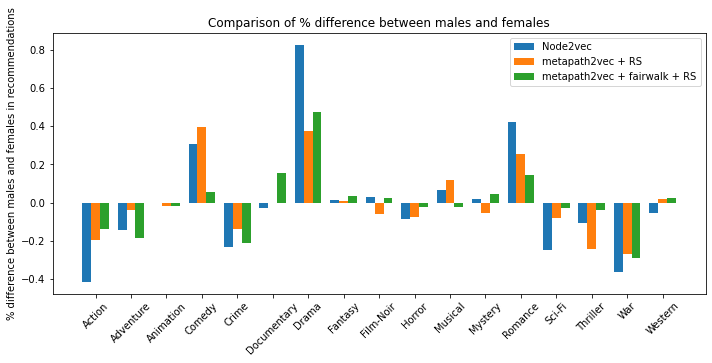

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = sorted(list(node2vec_df['genre'].unique()))#['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = regular_df[regular_df['gender']=='M']['fraction']#[20, 34, 30, 35, 27]
# women_means = regular_df[regular_df['gender']=='F']['fraction']#[25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x-width, node2vec_diff, width, label='Node2vec')
rects2 = ax.bar(x, metapath2vec_rs_diff, width, label='metapath2vec + RS')
rects2 = ax.bar(x + width, metapath2vec_rs_fair_diff, width, label='metapath2vec + fairwalk + RS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% difference between males and females in recommendations')
ax.set_title('Comparison of % difference between males and females')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()
plt.savefig('../../results/mf_rs_comp.png')
plt.show()